In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
# Dummy replacements for missing functions from stockFunctions
def rmsemape(actual, predicted):
    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
    import numpy as np
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    print(f"RMSE: {rmse}, MAPE: {mape}")
    return rmse, mape


In [3]:
def graph(actual, predicted, label1, label2, title, xlabel, ylabel):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label=label1)
    plt.plot(predicted, label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [4]:
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

In [5]:
# Fetch stock data using yfinance
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
stk_data = yf.download('AXISBANK.NS', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,742.489990,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,734.369080,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.970398,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,739.401001,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,748.418701,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,668.106445,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,666.462341,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,676.127747,5586980


In [7]:
stk_data = stk_data[["Open", "High", "Low", "Close"]]
stk_data.to_csv("AXISBANK.NS.csv")


In [8]:
# Normalize data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[["High"]])
print("Len:", data1.shape)


Len: (150, 1)


In [9]:
# ARIMA model fitting and evaluation with different orders
orders = [(0,0,0), (0,0,1), (2,0,1), (1,1,1)]
for order in orders:
    model = SARIMAX(data1, order=order, seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    y_pred = model_fit.predict(start=0, end=len(data1)-1)
    rmsemape(data1, y_pred)


RMSE: 0.4904748417309663, MAPE: 0.9933333333333333
RMSE: 0.26502232861740804, MAPE: 2841114512226.044
RMSE: 0.0640711058870467, MAPE: 1079088388289.454
RMSE: 0.06421144579794667, MAPE: 1096918096048.8973


/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


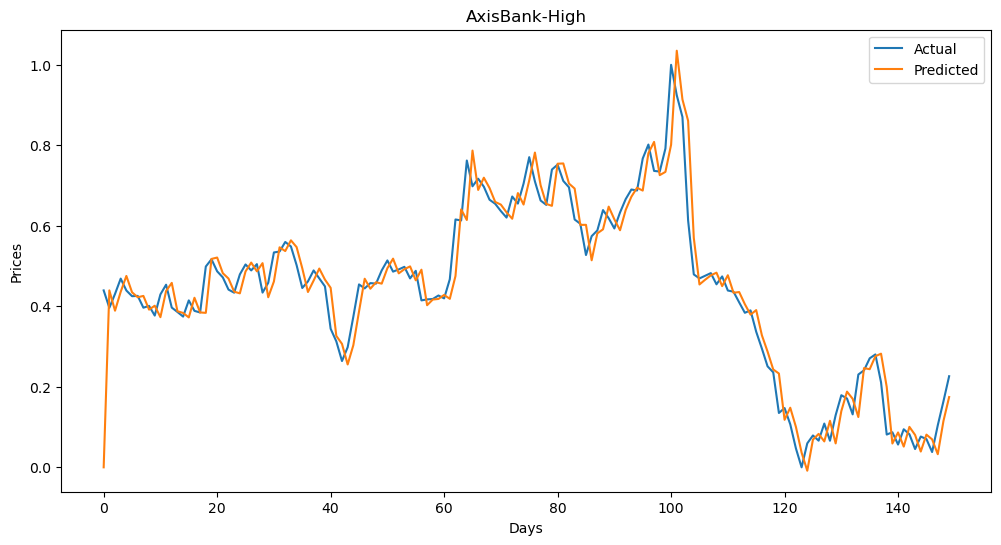

In [10]:
# Plotting actual vs predicted
graph(data1, y_pred, "Actual", "Predicted", "AxisBank-High", "Days", "Prices")


In [11]:
# Converting predictions and actuals back to original scale
aTestNormTable = conversionSingle(data1, ["High"])
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori, ["High"])


In [12]:
pTestNormTable = conversionSingle(y_pred, ["High"])
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = conversionSingle(predicted_stock_price_test_ori, ["High"])


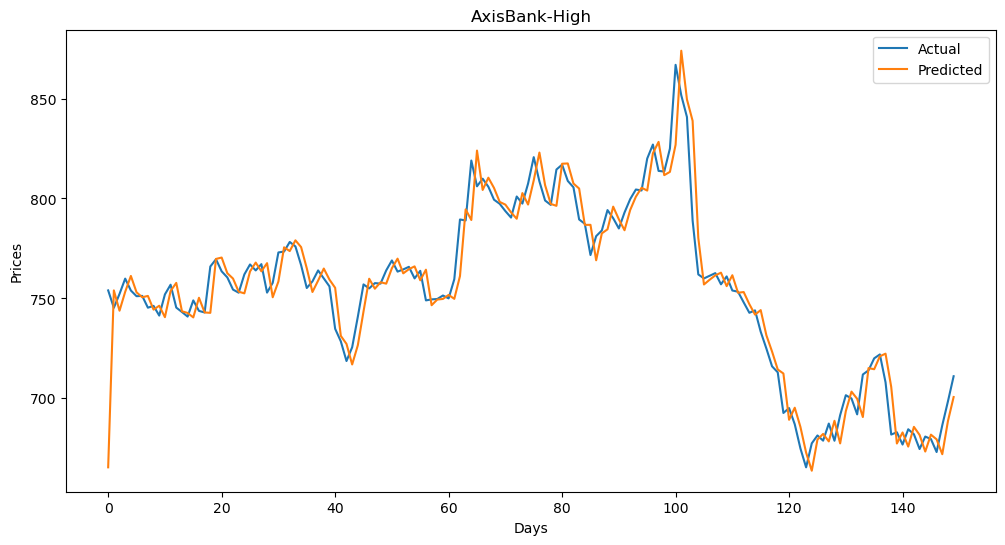

In [13]:
# Plotting the original scale values
graph(actual_stock_price_test_oriA, predicted_stock_price_test_oriP, "Actual", "Predicted", "AxisBank-High", "Days", "Prices")


In [14]:
# Calculate RMSE and MAPE for original scale values
rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)


RMSE: 12.93539653982748, MAPE: 0.01112525686870292


(12.93539653982748, 0.01112525686870292)

In [15]:
# Forecasting
forecast = model_fit.predict(start=len(data1), end=len(data1)+15)
fTestNormTable = conversionSingle(forecast, ["Highfore"])
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = conversionSingle(forecast_stock_price_test_ori, ["Highfore"])
forecast_stock_price_test_oriF.to_csv("HighSARIMA.csv", index=False)
print(forecast_stock_price_test_oriF)

      Highfore
0   713.265832
1   713.775385
2   713.892562
3   713.919508
4   713.925704
5   713.927129
6   713.927457
7   713.927532
8   713.927549
9   713.927553
10  713.927554
11  713.927554
12  713.927555
13  713.927555
14  713.927555
15  713.927555
